In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

print(device)

cuda


In [2]:
learning_rate = 0.001
training_epochs = 15
batch_size=100

In [3]:
mnist_train=dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [7]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.layer2 = torch.nn.Sequential(
        torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc = torch.nn.Linear(7*7*64, 10, bias=True)

    torch.nn.init.xavier_uniform_(self.fc.weight)
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc(out)
    return out

In [8]:
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [9]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader:
    X = X.to(device)
    Y = Y.to(device)
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch+1, avg_cost))

print('Learning finished')

총 배치의 수 : 600
[Epoch:    1] cost = 0.229194835
[Epoch:    2] cost = 0.0600995906
[Epoch:    3] cost = 0.0439731032
[Epoch:    4] cost = 0.0355036557
[Epoch:    5] cost = 0.0293391123
[Epoch:    6] cost = 0.0254137088
[Epoch:    7] cost = 0.0206346922
[Epoch:    8] cost = 0.0184309985
[Epoch:    9] cost = 0.0149492081
[Epoch:   10] cost = 0.0127989016
[Epoch:   11] cost = 0.0109589696
[Epoch:   12] cost = 0.00887553114
[Epoch:   13] cost = 0.00866539963
[Epoch:   14] cost = 0.00611834181
[Epoch:   15] cost = 0.00623074686
Learning finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9860000014305115
Label:  8
Prediction:  8


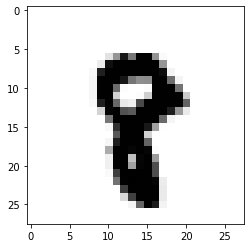

In [11]:
import random
import matplotlib.pyplot as plt

with torch.no_grad():
  X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  r = random.randint(0, len(mnist_test)-1)
  X_single_data = mnist_test.test_data[r:r+1].view(1,1,28,28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = model(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()